In [1]:
%run SAT_help_functions.ipynb

In [64]:
data_dirs = {"Dutilh 2013":"/Users/wangjiashun/Desktop/Reserach on SAT/datasets/transformed/Dutilh2013/sub",
            "Dutilh 2019": '/Users/wangjiashun/Desktop/Reserach on SAT/datasets/transformed/Dutilh2019/sub',
            "Evans 2017":  "/Users/wangjiashun/Desktop/Reserach on SAT/datasets/transformed/Evans2017/sub",
            "Lerche 2017": "/Users/wangjiashun/Desktop/Reserach on SAT/datasets/transformed/Lerche2017/sub",
            "Rae 2014":    "/Users/wangjiashun/Desktop/Reserach on SAT/datasets/transformed/Rae2014/sub"}

In [101]:
sample_size = {"Dutilh 2013":32, "Dutilh 2019":20, "Evans 2017":47, "Lerche 2017":38, "Rae 2014":34}

In [158]:
datasets = ["Dutilh 2013", "Dutilh 2019", "Evans 2017", "Rae 2014"]

In [159]:
results = pd.DataFrame(columns = ["Dataset", "Participant", "RT", "Accuracy", "SAT"])

for dataset in datasets:

    for sub in range(1,sample_size[dataset]+1):

        data_dir = data_dirs[dataset]
        data_sub = pd.read_csv(data_dir+str(sub)+".csv")

        data_cor = data_sub[data_sub["Correct"]==1]
        rt_s = data_cor[data_cor["Cond"] == "Speed"]["Time"].mean()
        rt_a = data_cor[data_cor["Cond"] == "Accuracy"]["Time"].mean()

        acc_s = data_sub[data_sub["Cond"] == "Speed"]["Correct"].mean()
        acc_a = data_sub[data_sub["Cond"] == "Accuracy"]["Correct"].mean()

        result_sub = {"Dataset":[dataset,dataset], "Participant":[sub,sub], "RT": [rt_s, rt_a], "Accuracy":[acc_s,acc_a], "SAT": ["Speed","Accuracy"]}
        result_sub = pd.DataFrame(result_sub)
        results = pd.concat((results,result_sub))

/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_79612/2049598153.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat((results,result_sub))


In [160]:
results

,Dataset,Participant,RT,Accuracy,SAT
0,Dutilh 2013,1,0.498566,0.565737,Speed
1,Dutilh 2013,1,0.681723,0.751880,Accuracy
0,Dutilh 2013,2,0.557963,0.894942,Speed
1,Dutilh 2013,2,0.607621,0.827957,Accuracy
0,Dutilh 2013,3,0.693663,0.348993,Speed
...,...,...,...,...,...
1,Rae 2014,32,0.440863,0.575092,Accuracy
0,Rae 2014,33,0.420607,0.546789,Speed
1,Rae 2014,33,0.487579,0.560976,Accuracy
0,Rae 2014,34,0.399151,0.521978,Speed


In [161]:
result_plot = results.groupby(by = ['Dataset','SAT']).aggregate({"RT": "mean", "Accuracy":"mean"})

In [162]:
result_plot

RT  Accuracy
Dataset     SAT                         
Dutilh 2013 Accuracy  0.557909  0.898516
            Speed     0.480555  0.811702
Dutilh 2019 Accuracy  0.752715  0.854500
            Speed     0.521234  0.741292
Evans 2017  Accuracy  1.233620  0.859467
            Speed     0.681873  0.814407
Rae 2014    Accuracy  0.496760  0.728554
            Speed     0.411431  0.648677

(0.0, 2.0)

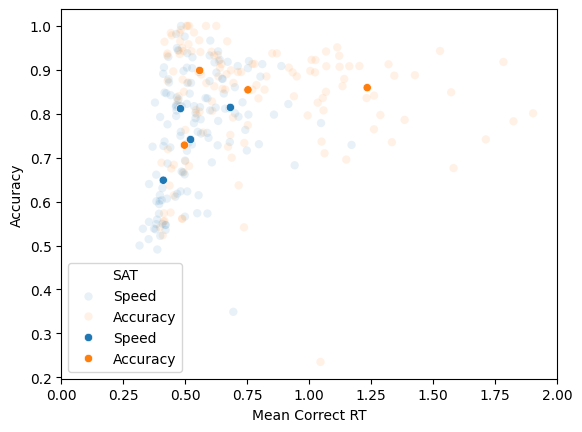

In [164]:
sns.scatterplot(data=results, x = "RT", y="Accuracy", hue = "SAT", hue_order = ["Speed", "Accuracy"], alpha = 0.1)

sns.scatterplot(data=result_plot, x = "RT", y="Accuracy", hue = "SAT", hue_order = ["Speed", "Accuracy"])

plt.xlabel("Mean Correct RT")
plt.xlim(0,2)

Text(0.5, 0, 'Mean Correct RT')

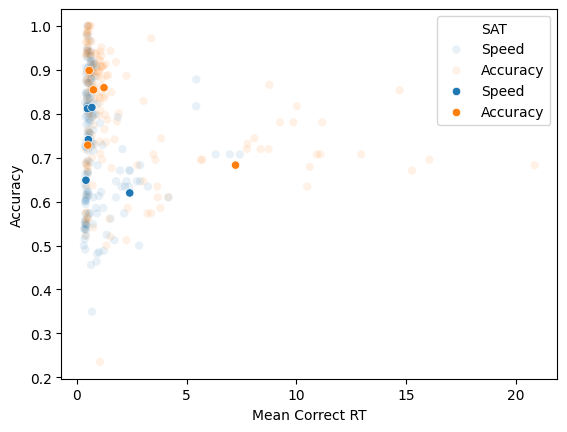

In [156]:
sns.scatterplot(data=results, x = "RT", y="Accuracy", hue = "SAT", hue_order = ["Speed", "Accuracy"], alpha = 0.1)
sns.scatterplot(data=result_plot, x = "RT", y="Accuracy", hue = "SAT", hue_order = ["Speed", "Accuracy"])

plt.xlabel("Mean Correct RT")

In [166]:
results = pd.DataFrame(columns = ["Dataset", "Participant", "RTdif", "Accuracy", "SAT"])

for dataset in datasets:

    for sub in range(1,sample_size[dataset]+1):

        data_dir = data_dirs[dataset]
        data_sub = pd.read_csv(data_dir+str(sub)+".csv")

        data_cor = data_sub[data_sub["Correct"]==1]
        rt_s_c = data_cor[data_cor["Cond"] == "Speed"]["Time"].mean()
        rt_a_c = data_cor[data_cor["Cond"] == "Accuracy"]["Time"].mean()
        
        data_err = data_sub[data_sub["Correct"]==0]
        rt_s_e = data_err[data_err["Cond"] == "Speed"]["Time"].mean()
        rt_a_e = data_err[data_err["Cond"] == "Accuracy"]["Time"].mean()
        
        acc_s = data_sub[data_sub["Cond"] == "Speed"]["Correct"].mean()
        acc_a = data_sub[data_sub["Cond"] == "Accuracy"]["Correct"].mean()

        result_sub = {"Dataset":[dataset,dataset], "Participant":[sub,sub], "RTdif": [rt_s_c-rt_s_e, rt_a_c-rt_a_e], "Accuracy":[acc_s,acc_a], "SAT": ["Speed","Accuracy"]}
        result_sub = pd.DataFrame(result_sub)
        results = pd.concat((results,result_sub))
results

/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_79612/3259622000.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat((results,result_sub))


,Dataset,Participant,RTdif,Accuracy,SAT
0,Dutilh 2013,1,0.020710,0.565737,Speed
1,Dutilh 2013,1,-0.016385,0.751880,Accuracy
0,Dutilh 2013,2,0.070722,0.894942,Speed
1,Dutilh 2013,2,-0.255610,0.827957,Accuracy
0,Dutilh 2013,3,-0.197897,0.348993,Speed
...,...,...,...,...,...
1,Rae 2014,32,0.075863,0.575092,Accuracy
0,Rae 2014,33,0.029615,0.546789,Speed
1,Rae 2014,33,0.037275,0.560976,Accuracy
0,Rae 2014,34,0.026139,0.521978,Speed


In [167]:
result_plot = results.groupby(by = ['Dataset','SAT']).aggregate({"RTdif": "mean", "Accuracy":"mean"})

In [171]:
result_plot

RTdif  Accuracy
Dataset     SAT                         
Dutilh 2013 Accuracy  0.023512  0.898516
            Speed     0.039797  0.811702
Dutilh 2019 Accuracy -0.092782  0.854500
            Speed     0.002715  0.741292
Evans 2017  Accuracy -0.421428  0.859467
            Speed    -0.049311  0.814407
Rae 2014    Accuracy  0.050579  0.728554
            Speed     0.027323  0.648677

Text(0, 0.5, 'RT Difference')

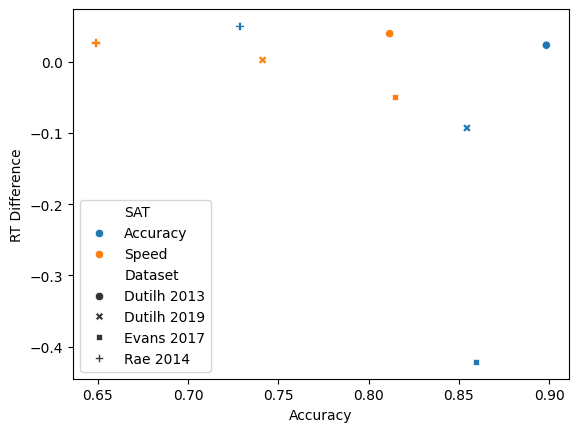

In [172]:

sns.scatterplot(data=result_plot, x = "Accuracy", y="RTdif", hue = "SAT", style = "Dataset")

plt.ylabel("RT Difference")
 
